<a href="https://www.kaggle.com/ronney21/fashion-mnist-logistic-nn?scriptVersionId=90232651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fashion MNIST: Step-by-step implementaion of Logistic regression NN and by using Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

!pip install ipyplot &> /dev/null
import ipyplot
import matplotlib.pyplot as plt

## 1. For the dataset, extract the training and testing images belonging to label 0 (T-shirts/tops) and label 1 (trousers).

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
ipyplot.plot_images(train_images,max_images=15)

In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
print(f'The images are {train_images[0][0].size} x {train_images[0][1].size} arrays.')

The images are 28 x 28 arrays.


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_mapping = dict(zip(range(10),class_names))
class_mapping

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [9]:
train_indices=np.where((train_labels==0) | (train_labels==1))[0]
test_indices=np.where((test_labels==0) | (test_labels==1))[0]

train_labels=train_labels[train_indices]
train_images=train_images[train_indices,:,:]
test_labels=test_labels[test_indices]
test_images=test_images[test_indices,:,:]

In [10]:
def label_name(x):
    return class_mapping[x]

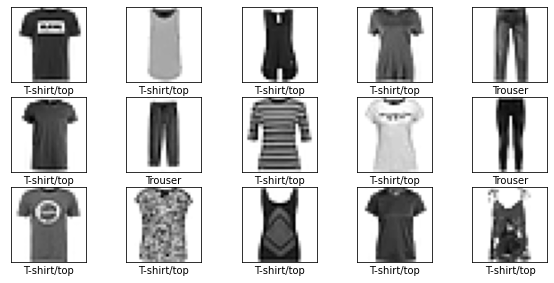

In [11]:
plt.figure(figsize=(10,8))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(label_name(train_labels[i]))
plt.show()

In [12]:
print(f'There are {len(train_images)} images in the training set and {len(test_images)} images in the testing set.')
print(f'There are {len(train_labels)} labels in the training set and {len(test_labels)} labels in the test set.')

There are 12000 images in the training set and 2000 images in the testing set.
There are 12000 labels in the training set and 2000 labels in the test set.


## 2. Train and evaluate a single layer (single neuron) logistic regression neural network-(step- by-step and using tensorflow)

In [13]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

def init_params(dimension):
  w=np.zeros((dimension,1))
  b=0
  return w,b

def propagate(w,b,X,Y):
  n=X.shape[1]
  #forward_pass
  predicted=sigmoid(np.dot(w.T,X)+b)
  cost = (-1/n)*(np.sum(np.multiply(Y,np.log(predicted)) + np.multiply((1-Y),np.log(1-predicted))))
  #backward pass
  dw=(1/n)*np.dot(X,(predicted-Y).T)
  db=(1/n)*np.sum(predicted-Y)
  
  cost=np.squeeze(cost)
  grads={"dw":dw,"db":db}
  return grads,cost

In [14]:
def train(w,b,X,Y,epochs,lr):
  costs=[]
  for i in range(epochs):
    grads,cost=propagate(w,b,X,Y)
    
    dw=grads["dw"]
    db=grads["db"]

    w=w-(lr*dw)
    b=b-(lr*db)

    if(i%10==0):
      costs.append(cost)
      print("cost after %i iterations:%f"%(i,cost))
    
  params={"w":w,"b":b}
  grads={"dw":dw,"db":db}
  
  return params,grads,costs

In [15]:
def predict(w,b,X):
  A=sigmoid(np.dot(w.T,X)+b)
  Y_predict=np.zeros((1,X.shape[1]))
  for i in range(len(A)):
    if(A[0,i]>0.5):
      Y_predict[0,i]=1
    else:
      Y_predict[0,i]=0
  return A,Y_predict

In [16]:
def model(X_train,Y_train,X_test,Y_test,epochs,lr):
  w,b=init_params(X_train.shape[0])
  params,grads,costs=train(w,b,X_train,Y_train,epochs,lr)
  w=params["w"]
  b=params["b"]
  A,Y_test_predicted=predict(w,b,X_test)
  print("test_accuracy : {} %".format(100-np.mean(np.abs(Y_test_predicted  - Y_test)) * 100))
  return A


In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
A=model(train_images.reshape((len(train_images),-1)).T,train_labels.T,test_images.reshape((len(test_images),-1)).T,test_labels.T,100,1)

cost after 0 iterations:0.693147
cost after 10 iterations:0.178047
cost after 20 iterations:0.094596
cost after 30 iterations:0.068989
cost after 40 iterations:0.060721
cost after 50 iterations:0.056341
cost after 60 iterations:0.053358
cost after 70 iterations:0.051119
cost after 80 iterations:0.049352
cost after 90 iterations:0.047909
test_accuracy : 50.05 %


## 3. Train and evaluate a complex neural network containing two hidden layers each with 100 neurons using tensorflow.

In [19]:
model = keras.Sequential([
    # Flatten two dimansional images into one dimansion 28*28pixles=784pixels.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])

2022-03-16 05:09:03.778275: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 05:09:03.869970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 05:09:03.870660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 05:09:03.871788: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

2022-03-16 05:09:06.256487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/10
375/375 [==============================] - 2s 2ms/step - loss: 0.0889 - accuracy: 0.9736
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9877
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9917
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 0.9935
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9929
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.9950
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9973
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9949

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9915
